In [1]:
import numpy as np
import pandas as pd


## 4.39

In [2]:
df = pd.read_csv("./T4-6.DAT", sep="\t", header=None)

In [3]:
import scipy.stats as stats

In [4]:
df.apply(stats.shapiro, axis=0)

,0,1,2,3,4,5,6
0,0.974861,0.977879,0.983875,0.984610,0.962556,6.356202e-01,6.321636e-01
1,0.016167,0.031978,0.126901,0.150066,0.001196,1.728084e-16,1.449176e-16


In [5]:
data = df[[0,1,2,3,4]]

In [6]:
x_bar = data.mean(axis=0)
d2 = np.zeros(len(data))
for i in range(len(data)):
    d2[i] = (data.iloc[i] - x_bar).T @ np.linalg.inv(data.cov().values) @ (data.iloc[i] - x_bar)
 

In [7]:
d2_sort = np.sort(d2)

In [8]:
n = len(d2_sort)
y = np.zeros(n)
for j in range(1, len(d2_sort)+1):
    y[j-1] = stats.chi2.ppf((j-1/2)/n, 5)

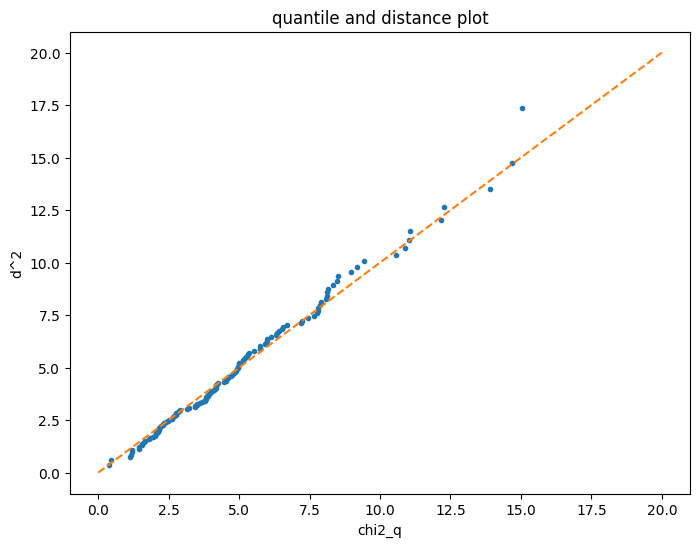

In [9]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=[8,6])
plt.plot(d2_sort, y, 'o', ms=3)
plt.plot([0, 20], [0, 20], '--')
plt.xlabel("chi2_q")
plt.ylabel("d^2")
plt.title("quantile and distance plot")
plt.savefig("quantile_distance_plot.svg")

In [10]:
non_normal = data[[0,1,4]]
non_normal.apply(stats.boxcox, axis=0)

,0,1,4
0,"[8.81994673375192, 5.106986624927221, 5.696971...","[25.010815688114914, 25.010815688114914, 46.23...","[3.922321258603678, 2.5713126438928815, 2.8858..."
1,0.523772,1.396261,0.381547


## 5.2

In [11]:
x = np.array([[2,12],[8,9],[6,9],[8,10]])
c = np.array([[1,-1],[1,1]])
mu = np.array([7,11])

In [12]:
new_x = (c @ x.T).T
x_bar = x.mean(axis=0)
new_x_bar = new_x.mean(axis=0)
new_mu = (c @ mu.T).T

In [13]:
print(x_bar)
print(new_x_bar)

[ 6. 10.]
[-4. 16.]


In [14]:
t2 = 4 * ((x_bar - mu).T @ np.linalg.inv(np.cov(x.T, ddof=1)) @ (x_bar - mu))
new_t2 = 4 * ((new_x_bar - new_mu).T @ np.linalg.inv(np.cov(new_x.T, ddof=1)) @ (new_x_bar - new_mu))

In [15]:
print(np.linalg.inv(np.cov(x.T, ddof=1)))
print(np.linalg.inv(np.cov(new_x.T, ddof=1)))

[[0.40909091 0.68181818]
 [0.68181818 1.63636364]]
[[ 0.17045455 -0.30681818]
 [-0.30681818  0.85227273]]


In [16]:
print(t2, new_t2)
print(t2 - new_t2)

13.63636363636363 13.636363636363647
-1.7763568394002505e-14
